In [17]:
# We import all the libraries we need
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import shap
shap.initjs()

cleaned_calendar_data = pd.read_csv("/home/apprenant/Documents/Brief-12-Airbnb/data/02_intermediate/cleaned_calendar.csv", low_memory=False, index_col='Unnamed: 0')
cleaned_listings_data = pd.read_csv("/home/apprenant/Documents/Brief-12-Airbnb/data/02_intermediate/cleaned_listings.csv", low_memory=False, index_col='Unnamed: 0')
cleaned_reviews_data = pd.read_csv("/home/apprenant/Documents/Brief-12-Airbnb/data/02_intermediate/cleaned_reviews.csv", index_col='Unnamed: 0')

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
Columns (0,3,5,6) have mixed types.Specify dtype option on import or set low_memory=False.


In [2]:
cleaned_listings_data.columns

Index(['id', 'host_id', 'host_name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'host_since_annee'],
      dtype='object')

In [3]:
selected_data = cleaned_listings_data[['host_listings_count', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
'review_scores_value', 'reviews_per_month', 'host_since_annee']]

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [5]:
print(cleaned_listings_data.isnull().sum()) 

id                                 0
host_id                            0
host_name                          0
host_since                         0
host_response_time             41209
host_response_rate             41209
host_acceptance_rate           37026
host_is_superhost                  0
host_listings_count                0
neighbourhood_cleansed             0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms_text                     0
bedrooms                           0
beds                               0
price                              0
minimum_nights                     0
maximum_nights                     0
has_availability                   0
availability_365                   0
number_of_reviews                  0
review_scores_rating               0
review_scores_accuracy             0
review_scores_cleanliness          0
r

In [6]:
X = selected_data
y = cleaned_listings_data['price']
X100 = shap.utils.sample(X, 100)

In [7]:
def modelizing_linear_regression(database, target_value):
    y = target_value
    X = database
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)
    regr = linear_model.LinearRegression()
    regr.fit(Xtrain, ytrain)
    return regr, Xtrain, ytrain, Xtest, ytest

In [8]:
defined_regr, X_train, y_train, X_test, y_test = modelizing_linear_regression(X, y)

In [9]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", defined_regr.coef_[i].round(4))

Model coefficients:

host_listings_count = 0.1041
accommodates = 32.4747
bedrooms = 10.8136
beds = -2.4811
minimum_nights = -0.0084
maximum_nights = 0.0
availability_365 = 0.1396
number_of_reviews = -0.0804
review_scores_rating = 0.7196
review_scores_accuracy = -1.4462
review_scores_cleanliness = 7.772
review_scores_checkin = -0.7804
review_scores_communication = -5.7333
review_scores_location = 6.1913
review_scores_value = -7.7963
reviews_per_month = -4.7816
host_since_annee = 2.5338


100%|██████████| 100/100 [01:36<00:00,  1.04it/s]


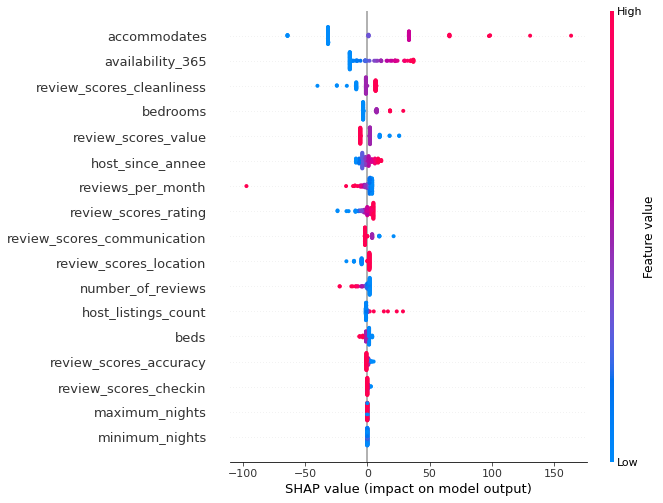

In [13]:
lr_explainer = shap.KernelExplainer(defined_regr.predict, X100)
lr_shap_values = lr_explainer.shap_values(X100)
shap.summary_plot(lr_shap_values, X100)

In [19]:
X100.mean()

host_listings_count              10.9300
accommodates                      2.9700
bedrooms                          1.3100
beds                              1.5800
minimum_nights                    4.6200
maximum_nights                  758.5500
availability_365                100.2000
number_of_reviews                24.6000
review_scores_rating             93.1600
review_scores_accuracy            9.5200
review_scores_cleanliness         9.1400
review_scores_checkin             9.6800
review_scores_communication       9.6800
review_scores_location            9.7300
review_scores_value               9.2800
reviews_per_month                 0.8739
host_since_annee               2015.5800
dtype: float64

In [18]:
shap.force_plot(lr_explainer.expected_value, lr_shap_values[10,:], X100.iloc[10,:])